In [7]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, classification_report,ConfusionMatrixDisplay, 
                             roc_curve,auc,confusion_matrix, ConfusionMatrixDisplay)

In [8]:
dataset = pd.read_csv('../dataset/m_dataset.csv')
dataset.head(2)

,event_name,search,added_to_cart,removed_from_cart,begin_checkout,browser,page_path,city,day_of_week,device_category,...,screen_width,screen_height,direct,organic_search,organic_social,referral,android,ios,macintosh,windows
0,4,5,4,0,0,1,21,29,7,1,...,360,820,0,0,0,1,1,0,0,0
1,4,9,1,1,0,1,21,29,2,1,...,360,800,0,0,0,1,1,0,0,0


# MODELING START BELOW

### LOGISTIC REGRESSION  STARTS HERE 

In [9]:
start_time = time.time()
# Independent variables
X = dataset.drop('signup', axis=1)

# Dependent variable
y = dataset['signup']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters to tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Initialize logistic regression model
clf = LogisticRegression(max_iter=10000)

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model after hyperparameter tuning
best_clf = grid_search.best_estimator_

# Making predictions using the best model
y_pred = best_clf.predict(X_test)

end_time = time.time()

duration = end_time - start_time

# Evaluating the model
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Execution time in seconds {duration}")


Best Parameters: {'C': 100}
Accuracy: 0.5393258426966292
              precision    recall  f1-score   support

       False       0.56      0.69      0.62      1154
        True       0.50      0.36      0.42       982

    accuracy                           0.54      2136
   macro avg       0.53      0.53      0.52      2136
weighted avg       0.53      0.54      0.53      2136

Execution time in seconds 54.53499102592468


In [10]:

# Assuming clf is your trained LogisticRegression model
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# Get the coefficients (weights)
coefficients = clf.coef_[0]

# Assuming X_train contains the feature names
feature_names = X_train.columns

# Calculate feature importance using the absolute value of coefficients
feature_importance = np.abs(coefficients)

# Create a dictionary mapping feature names to their importance
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Print or visualize the feature importance
print("Feature Importance:")
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance:.4f}")


Feature Importance:
event_name: 0.0844
search: 0.0022
added_to_cart: 0.0191
removed_from_cart: 0.0237
begin_checkout: 0.0184
browser: 0.0128
page_path: 0.0006
city: 0.0153
day_of_week: 0.0555
device_category: 0.0361
session: 0.0128
views: 0.0194
event_count_per_user: 0.0143
events_per_session: 0.0443
user_engagement: 0.0577
engaged_session: 0.0030
engagement_rate: 0.0403
screen_width: 0.0001
screen_height: 0.0000
direct: 0.1638
organic_search: 0.0909
organic_social: 0.0157
referral: 0.1150
android: 0.0812
ios: 0.0506
macintosh: 0.0090
windows: 0.0047


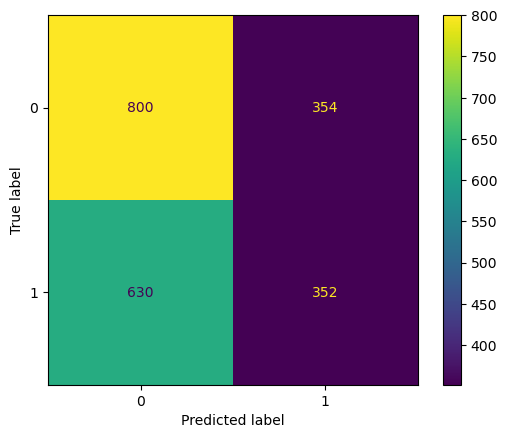

In [11]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

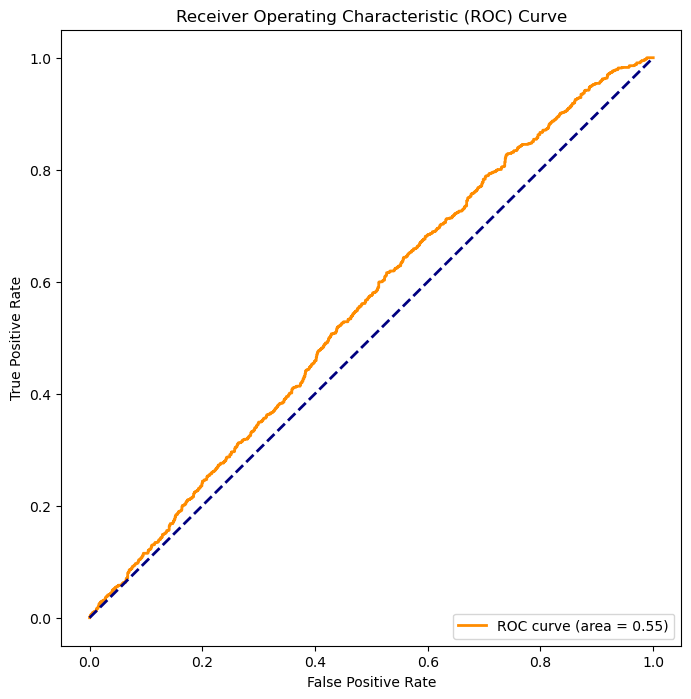

In [12]:
# Get the predicted probabilities for the positive class
y_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
